# Simulating Sequence

### Overview of Gameplay
Sequence is a tabletop strategy game, usually played with 2 to 3 people, where each player attempts to be the first to place five of their chips in a row (or "sequence") on the board. The board consists of a 10x10 grid, where each square represents a card in a standard deck of cards (except for the Jacks). Each card is represented twice on the board, and the four corners of the grid are "free spaces" that can a player can use as part of their sequence. The sequences can be horizontal, vertical, or diagonal.

At the beginning of the game, each player is dealt seven cards from a deck consisting of 104 cards, i.e. two standard decks of cards. They take turns choosing and discarding a card from their hand, placing a chip on one of the matching spaces on the board (as long as it is unoccupied), then drawing another card from the deck. Jacks with two cards can be used as wild cards, to place a chip on any unoccupied space on the board, and Jacks with one eye can be used to remove an opponent's chip from the board.

The first player to get a "sequence," i.e. five chips in a row, wins the game.

The wikipedia page, which contains further explanations and alternative rules and gameplay, can be found here: https://en.wikipedia.org/wiki/Sequence_(game)
###
### Simulation
I will be simulating a game with only one player and no Jacks in the deck, at first, to see how many moves it takes to win on average. Then, I will attempt to simulate a game with one player, no Jacks in the deck, and more than one card in their hand, to see how the average number of moves it takes to win changes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Representing the Board

An essential part of this game is keeping track of which spaces on the board are occupied or not, and so I will be creating a 10x10 numpy array where 1 represents an occupied space and 0 represents an unoccupied space. To keep track of which card is where on the board, I will be creating a python dictionary, where the card is the key, and the two sets of coordinates representing its places on the board are the value.

In [2]:
board = np.zeros((10, 10))

# all cards will be represented with a string
suits = ["spade", "diamond", "club", "heart"]
card_types = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Q", "K", "A"]
card_types_reverse = ["A", "K", "Q", "10", "9", "8", "7", "6", "5", "4", "3", "2"]
deck_of_cards = []

for suit in suits:
    for card_type in card_types:
        deck_of_cards.append(suit + card_type)
# print(deck_of_cards)

In [3]:
card_dict = {}
for card in deck_of_cards:
    card_dict[card] = []
# print(card_dict)

# coords = (row, column)
# spade cards
card_dict['spade2'] = [(0, 1), (8, 6)]
card_dict['spade3'] = [(0, 2), (8, 5)]
card_dict['spade4'] = [(0, 3), (8, 4)]
card_dict['spade5'] = [(0, 4), (8, 3)]
card_dict['spade6'] = [(0, 5), (8, 2)]
card_dict['spade7'] = [(0, 6), (8, 1)]
card_dict['spade8'] = [(0, 7), (7, 1)]
card_dict['spade9'] = [(0, 8), (6, 1)]
card_dict['spade10'] = [(1, 9), (5, 1)]
card_dict['spadeQ'] = [(2, 9), (4, 1)]
card_dict['spadeK'] = [(3, 9), (3, 1)]
card_dict['spadeA'] = [(4, 9), (2, 1)]

# diamond cards
card_dict['diamond2'] = [(5, 9), (2, 2)]
card_dict['diamond3'] = [(6, 9), (2, 3)]
card_dict['diamond4'] = [(7, 9), (2, 4)]
card_dict['diamond5'] = [(8, 9), (2, 5)]
card_dict['diamond6'] = [(9, 8), (2, 6)]
card_dict['diamond7'] = [(9, 7), (2, 7)]
card_dict['diamond8'] = [(9, 6), (3, 7)]
card_dict['diamond9'] = [(9, 5), (4, 7)]
card_dict['diamond10'] = [(9, 4), (5, 7)]
card_dict['diamondQ'] = [(9, 3), (6, 7)]
card_dict['diamondK'] = [(9, 2), (7, 7)]
card_dict['diamondA'] = [(9, 1), (7, 6)]

# club cards
card_dict['club2'] = [(1, 4), (3, 6)]
card_dict['club3'] = [(1, 3), (3, 5)]
card_dict['club4'] = [(1, 2), (3, 4)]
card_dict['club5'] = [(1, 1), (3, 3)]
card_dict['club6'] = [(1, 0), (3, 2)]
card_dict['club7'] = [(2, 0), (4, 2)]
card_dict['club8'] = [(3, 0), (5, 2)]
card_dict['club9'] = [(4, 0), (6, 2)]
card_dict['club10'] = [(5, 0), (7, 2)]
card_dict['clubQ'] = [(6, 0), (7, 3)]
card_dict['clubK'] = [(7, 0), (7, 4)]
card_dict['clubA'] = [(8, 0), (7, 5)]

# heart cards
card_dict['heart2'] = [(8, 7), (5, 4)]
card_dict['heart3'] = [(8, 8), (5, 5)]
card_dict['heart4'] = [(7, 8), (4, 5)]
card_dict['heart5'] = [(6, 8), (4, 4)]
card_dict['heart6'] = [(5, 8), (4, 3)]
card_dict['heart7'] = [(4, 8), (5, 3)]
card_dict['heart8'] = [(3, 8), (6, 3)]
card_dict['heart9'] = [(2, 8), (6, 4)]
card_dict['heart10'] = [(1, 8), (6, 5)]
card_dict['heartQ'] = [(1, 7), (6, 6)]
card_dict['heartK'] = [(1, 6), (5, 6)]
card_dict['heartA'] = [(1, 5), (4, 6)]

# print(card_dict)

In [4]:
# testing if coordinates can be successfully accessed from dictionary
# chosen_card = "club9"
# 
# spot1 = card_dict[chosen_card][0]
# spot2 = card_dict[chosen_card][1]
# 
# print(spot1, spot2)
# print(spot1[0])

### Strategy

There are multiple strategies for this game, but the strategy my player will be taking is to place chips as close together as possible. I will be creating a function that can calculate the distance between any two spaces using their coordinates. To make things simple, at the beginning of the game, the player will play whichever card is closest to a free space. If there is more than one card close to a free space, the player will simply randomly choose one to play.

In [5]:
def distance_formula(x1, y1, x2, y2):
    """
    Given the coordinates of two points, this function calculates the
    distance between them.
    
    :param x1: x-coordinate of the first point
    :param y1: y-coordinate of the first point
    :param x2: x-coordinate of the second point
    :param y2: y-coordinate of the second point
    :return: the distance between the two points
    """
    dist = np.sqrt((x2 - x1)**2.0 + (y2 -y1)**2.0)
    
    return dist

def best_spot(board_state, chosen_card):
    """
    For each card in the deck, there are two spots on the board. This function
    will calculate the total distance between each spot and the chips already
    in play, and return the coordinates of the spot which has the least total
    distance.
    
    :param board_state: a numpy array that represents the current state of the board
    :param chosen_card: a string representing the card that the player wants to play
    :return: coordinates of best spot, and total distance for that spot
    """
    spot1 = card_dict[chosen_card][0]
    spot2 = card_dict[chosen_card][1]
    
    total_dist1 = 0
    total_dist2 = 0
    for i in range(10):
        for j in range(10):
            space = board_state[i][j]
            if space == 1.0:
                print("space occupied!  i: ", i, "j: ", j)
                if (i == spot1[0]) and (j == spot1[1]):
                    print("spot1 occupied!")
                    total_dist1 += 500
                elif (i == spot2[0]) and (j == spot2[1]):
                    print("spot2 occupied!")
                    total_dist2 += 500
                else:
                    total_dist1 += distance_formula(i, j, spot1[0], spot1[1])
                    total_dist2 += distance_formula(i, j, spot2[0], spot2[1])
            else:
                # print("space unoccupied")
                pass
    
    if total_dist1 < total_dist2:
        return spot1, total_dist1
    else:
        return spot2, total_dist2

In [6]:
# # testing distance and best spot functions
# test_board = np.zeros((10, 10))
# 
# # occupied_spaces = [(1, 3), (2, 6), (1, 8), (2, 8), (4, 4), (5, 6), (0, 0), (0, 9), (9, 9), (9, 0)]
# occupied_spaces = [(1, 3), (2, 6), (1, 8), (2, 8), (4, 4), (5, 6), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]
# 
# for coords in occupied_spaces:
#     row = coords[0]
#     col = coords[1]
#     test_board[row][col] = 1
# 
# # print(test_board)
# 
# chosen_one = "spade10"
# best = best_spot(test_board, chosen_one)
# print(best)

### Winning

At the end of each turn, the player will check for sequences. If a sequence has been achieved, the game will end.

In [89]:
def check_for_sequence(board_state):
    """
    Given the current state of the board, this function checks for
    five occupied spaces in a row, either horizontal, vertical, or
    diagonal.
    
    :param board_state: a 10x10 numpy array, where zero represents unoccupied spaces and one represents occupied space
    :return: True, if there is a sequence, and False if there is not
    """
    
    for i in range(10):
        count1 = 0
        count2 = 0
        for j in range(10):
            # check row for sequence
            if board_state[i][j] == 1:
                count1 += 1
            else:
                count1 = 0
            # check column for sequence
            if board_state[j][i] == 1:
                count2 += 1
            else:
                count2 = 0
            if (count1 == 5) or (count2 == 5):
                return True
    
    # check for diagonal sequences
    rev_ind = [i for i in range(9, -1, -1)]
    for num in range(5, 11):
        count3 = 0
        count4 = 0
        ind1 = num - 1
        for i in range(num):
            # print("(i, ind1): ", i, ind1)
            if board_state[i][ind1] == 1:
                count3 += 1
            else:
                count3 = 0
            # print("(rev_ind, i): ", rev_ind[ind1], i)
            if board_state[rev_ind[ind1]][i] == 1:
                count4 += 1
            else:
                count4 = 0
            ind1 -= 1
            if (count3 == 5) or (count4 == 5):
                return True

    for num in range(4, -1, -1):
        count5 = 0
        count6 = 0
        ind2 = num + 1
        for i in range(9, num, -1):
            # print("(ind2, i): ", ind2, i)
            if board_state[ind2][i] == 1:
                count5 += 1
            else:
                count5 = 0
            # print("(rev_ind, ind2): ", rev_ind[i], ind2)
            if board_state[rev_ind[i]][ind2] == 1:
                count6 += 1
            else:
                count6 = 0
            ind2 += 1
            if (count5 == 5) or (count6 == 5):
                return True
    
    return False

In [96]:
# testing sequence function
test_board = np.zeros((10, 10))

# no sequence
# occupied_spaces = [(9, 5), (1, 4), (2, 3), (3, 3), (4, 1), (5, 0), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]

# horizontal, vertical, and diagonal sequences
# occupied_spaces = [(1, 1), (2, 2), (3, 3), (4, 4), (4, 1), (5, 0), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]
# occupied_spaces = [(4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (5, 0), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]
# occupied_spaces = [(9, 1), (8, 2), (7, 3), (6, 4), (5, 5), (5, 0), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]
occupied_spaces = [(5, 3), (5, 4), (5, 6), (5, 7), (5, 5), (5, 0), (0, 0), (0, 9), (9, 9), (9, 0), (1, 9)]


for coords in occupied_spaces:
    row = coords[0]
    col = coords[1]
    test_board[row][col] = 1

print(test_board)
check_for_sequence(test_board)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


True

### Visualizing the Board

It is helpful to see where all the chips are on the board, and so I will be creating a function that plots colored dots on a 10x10 grid, where red ones represent occupied spaces and gray ones represent unoccupied spaces.

In [114]:
def visualize_the_board(board_state):
    """
    Given the current board state, this function creates a scatter plot,
    where the occupied spaces are red dots, and unoccupied spaces are gray
    dots.
    
    :param board_state: a 10x10 numpy array, where zero represents unoccupied spaces and one represents occupied space
    :return: a pretty scatter plot
    """
    
    x_occ = []
    y_occ = []
    x_unocc = []
    y_unocc = []
    
    for i in range(10):
        for j in range(10):
            if test_board[i][j] == 1:
                x_occ.append(i+0.5)
                y_occ.append(j+0.5)
            else:
                x_unocc.append(i+0.5)
                y_unocc.append(j+0.5)
    
    plt.scatter(x_occ, y_occ, c='red')
    plt.scatter(x_unocc, y_unocc, c='grey')
    plt.xticks([i for i in range(11)])
    plt.yticks([i for i in range(11)])
    plt.grid()

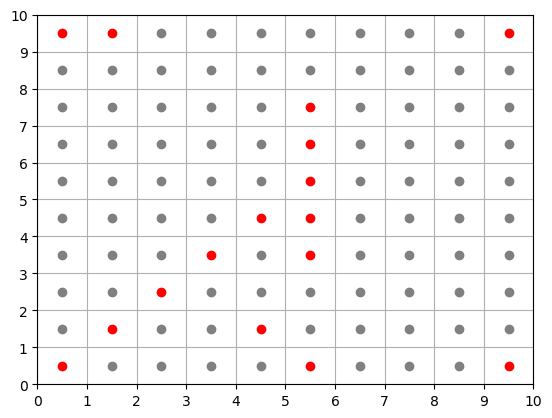

In [119]:
test_board = np.zeros((10, 10))
occupied_spaces = [(5, 3), (5, 4), (5, 6), (5, 7), (5, 5), (5, 0), (0, 0), (1, 1),
                   (2, 2), (3, 3), (4, 4), (4, 1), (0, 9), (9, 9), (9, 0), (1, 9)]

for coords in occupied_spaces:
    row = coords[0]
    col = coords[1]
    test_board[row][col] = 1

visualize_the_board(test_board)

### Taking a Turn

When a player has no cards in their hand for a game, their turn will consist of drawing a card, figuring out which spot on the board is best for that card, then playing that card. The function below will be used to have the player take a single turn.

In [116]:
def player_takes_turn(board_state, draw_pile):
    """
    This function returns the new board state after a player draws a card and plays a card.
    
    :param board_state: a 10x10 numpy array, where zero represents unoccupied spaces and one represents occupied space
    :param draw_pile: a list of all cards that haven't been drawn
    :return: the new board state, and the card that was drawn
    """
    
    card_ind = np.random.randint(0, len(draw_pile))
    card_drawn = draw_pile[card_ind]
    
    place_chip, _ = best_spot(board_state, card_drawn)
    board_state[place_chip[0]][place_chip[1]] = 1
    
    return board_state, card_drawn